In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 22})

# diagonal polarization

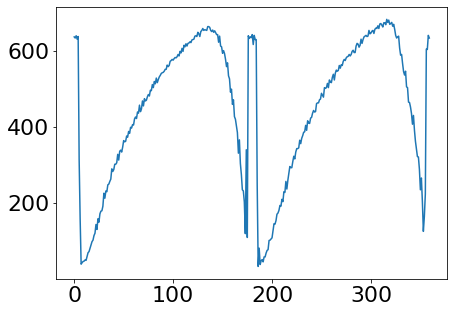

In [9]:
path = "../data/E_3_run1.csv"

data = np.genfromtxt(path)
plt.figure(figsize=(7,5))
plt.plot(data)
plt.show()

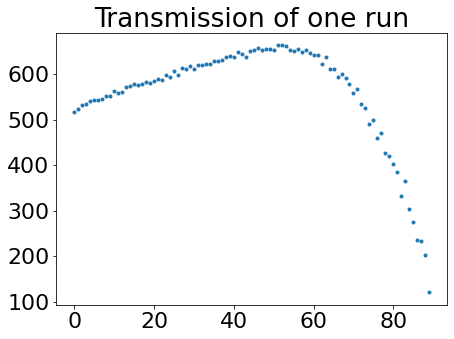

In [35]:
plt.figure(figsize=(7,5))
plt.title("Transmission of one run")
correction = 6
plt.plot(data[(90-correction):(180-correction)], ".")
plt.show()

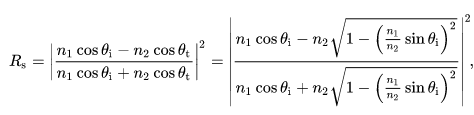

In [39]:
def R_s(t, n_2, n_1 = 1):
    """t in degrees"""
    T = t*2*np.pi/360
    
    return np.abs((n_1*np.cos(T) - n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2))/(n_1*np.cos(T) + n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)))**2

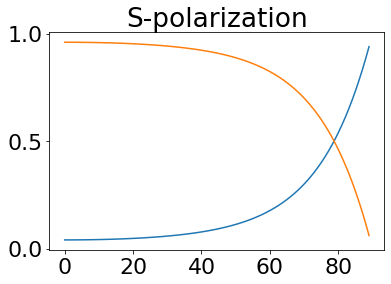

In [40]:
deg = np.linspace(0, 89, 90)

plt.title("S-polarization")
plt.plot(deg, R_s(deg, n_2=1.5))
plt.plot(deg, 1-R_s(deg, n_2=1.5))
plt.show()

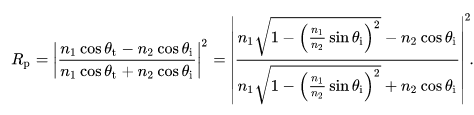

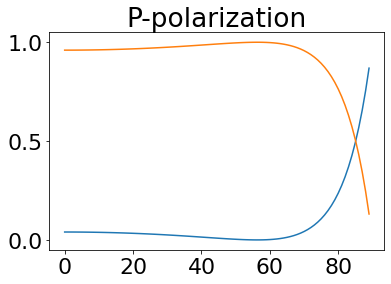

In [41]:
def R_p(t, n_2, n_1 = 1):
    """t in degrees"""
    T = t*2*np.pi/360
    
    return np.abs((n_1*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2) - n_2*np.cos(T))/(n_1*np.sqrt(1- (n_1*np.sin(T)/n_2)**2) + n_2*np.cos(T)))**2

deg = np.linspace(0, 89, 90)

plt.title("P-polarization")
plt.plot(deg, R_p(deg, n_2=1.5))
plt.plot(deg, 1-R_p(deg, n_2=1.5))
plt.show()

In [203]:
def transmission(t, n_2, theta, A):
    """theta is the angle of polarization from the floor in degrees"""
    theta = theta*2*np.pi/360
    Rs = R_s(t, n_2)
    Rp = R_p(t, n_2)
    
    return A*((np.sin(theta)**2 * (1-Rs)) + (np.cos(theta)**2 * (1-Rp)))

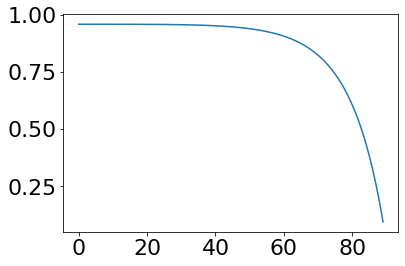

In [204]:
plt.plot(transmission(deg, 1.5, 46, A=1))
plt.show()

# fit to the data

## one datafile

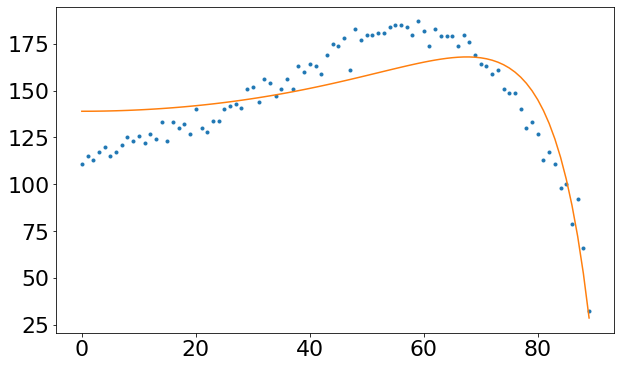

[2.42324819e+00 1.07378653e-03 1.68045697e+02]


In [205]:
path = "../data/E_3.csv"

data = np.genfromtxt(path)

d = data[(90-correction):(180-correction)]#/max(data[(90-correction):(180-correction)])

popt, pcov = curve_fit(transmission, xdata=deg, ydata=d, p0=[1.5, 45, 200])

f = plt.figure(figsize=(10,6))
plt.plot(deg, d, ".", label="Data")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]), label="Fit")
plt.show()
print(popt)

## all good datafiles

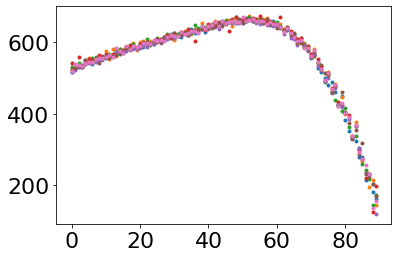

In [206]:
paths = ["../data/E_3_intensity_1700.csv",
         "../data/E_3_intensity_1700_run2.csv",
         "../data/E_3_intensity_1700_run3.csv",
         "../data/E_3_intensity_1700_run4.csv",
         "../data/E_3_run1.csv",
         "../data/E_3_intensity_2500.csv",
         "../data/E_3_intensity_3500.csv",
        ]
full_data = np.zeros((len(paths), 90))

for i, path in enumerate(paths):
    data = np.genfromtxt(path)
    d = data[(90-correction):(180-correction)]
    plt.plot(deg, d, ".")
    
    full_data[i] = d

plt.show()

/tmp/ipykernel_7336/1899790332.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.abs((n_1*np.cos(T) - n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2))/(n_1*np.cos(T) + n_2*np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)))**2
/tmp/ipykernel_7336/4257709087.py:8: RuntimeWarning: invalid value encountered in sqrt
  perr = np.diag(np.sqrt(pcov))


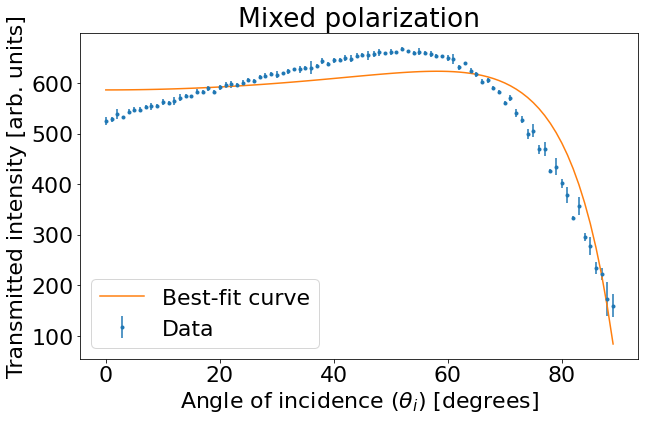

1.8212480342579525 1.9414217632052853
-18.40842573198768 83.82012706068213


In [207]:
mean = np.mean(full_data, axis=0)
A = max(mean)
#mean = mean/A
#mean = mean/1024
err = np.std(full_data, axis=0)#/1024

popt, pcov = curve_fit(transmission, xdata=deg, ydata=mean, sigma=err, p0=[1.5, 45, 600])
perr = np.diag(np.sqrt(pcov))

plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, err, fmt=".", label="Data")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]), label="Best-fit curve")
plt.title("Mixed polarization")
plt.xlabel(r"Angle of incidence ($\theta_i$) [degrees]")
plt.ylabel("Transmitted intensity [arb. units]")
plt.legend()
plt.show()

print(popt[0], perr[0])
print(popt[1], perr[1])

/home/yuliya/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


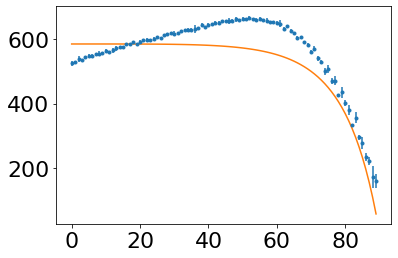

[  1.69103384  45.         626.01999345]


In [190]:
def trans2(t, n_2, theta,A):
    """theta is the angle of polarization from the floor in degrees"""
    theta = theta*2*np.pi/360
    Rs = R_s(t, n_2)
    Rp = R_p(t, n_2)
    
    return A*(1-Rp)

popt, pcov = curve_fit(trans2, xdata=deg, ydata=mean, sigma=err, p0=[1.5, 45, 600])

plt.errorbar(deg, mean, err, fmt=".")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]))
plt.show()

print(popt)

# Try again: Adding the transmittances at the end

In [160]:
def t_p(t, n_2, n_1=1):
    T = t*2*np.pi/360
    cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    
    return 2*n_1*np.cos(T)/(n_2*np.cos(T)+n_1*cos_theta_t)

def t_s(t, n_2, n_1=1):
    T = t*2*np.pi/360
    cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    
    return 2*n_1*np.cos(T)/(n_1*np.cos(T)+n_2*cos_theta_t)

def transmission(t, n_2, phi, A):
    """phi is the angle of polarization from the floor in degrees"""
    phi = phi*2*np.pi/360 # turn to rad
    n_1 =1 # index of refraction of air
    
    ts = np.abs(t_s(t, n_2))
    tp = np.abs(t_p(t, n_2))
    
    T = t*2*np.pi/360
    cos_theta_t = np.sqrt(1 - (n_1*np.sin(T)/n_2)**2)
    
    # transmission coef squared for mixed polarization
    t2 = np.cos(phi)**2 * ts**2 + np.sin(phi)**2 * tp**2
    
    return A*t2*(n_2*cos_theta_t)/(n_1*np.cos(T))

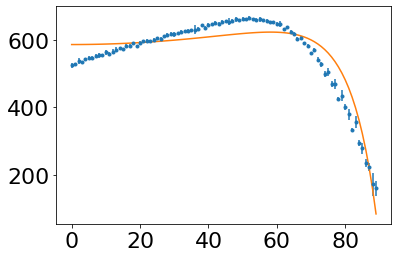

[1.82128705e+00 2.28708410e+05 6.41033232e+02]


In [192]:
popt, pcov = curve_fit(transmission, xdata=deg, ydata=mean, sigma=err, p0=[1, 46, 600])

plt.errorbar(deg, mean, err, fmt=".")
plt.plot(deg, transmission(deg, popt[0], popt[1], popt[2]))
plt.show()

print(popt)

# Another function (adding the transmittance at the end)